# Exploration des données
L'objectif de ce Notebook est d'explorer le dataset de Netflix (echantillon numéro 1) en repondant aux questions suivantes : 
* Quel est le nombre total de notes ?
* Quel est le nombre total d'utilisateurs ?
* Quel est le nombre total de films ?
* Comment sont distribuées les notes ?
* Comment est distribué le nombre total de notes par utilisateur ?


In [182]:
#Module pour charger et manipuler les données
import pandas as pd 
#Module pour calculer les statistiques
import numpy as np
#Module pour generer les graphes
import matplotlib.pyplot as plt
#Module pour calculer le mode
import statistics
#Afficher les graphes directement
%matplotlib inline
from collections import Counter 

In [183]:
#Charger les données
data = pd.read_csv("combined_data_1.csv")
data.columns

Index(['movie_id', 'customer_id', 'rating', 'date'], dtype='object')

On peut observer qu'on possède l'identifiant du film, l'identifiant du client, la note donnée et la date. Exemple avec les 10 premières lignes du jeu de données : 

In [184]:
data.head(10)

,movie_id,customer_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
5,1,893988,3,2005-11-17
6,1,124105,4,2004-08-05
7,1,1248029,3,2004-04-22
8,1,1842128,4,2004-05-09
9,1,2238063,3,2005-05-11


# Nombre total de notes

In [185]:
print("Nombre total de notes : {}".format(data.shape[0]))

Nombre total de notes : 24053764


# Nombre total d'utilisateurs

In [186]:
nb_utilisateur = data.groupby('customer_id').size().count()
print("Nombre total d'utilisateurs : {}".format(nb_utilisateur))

Nombre total d'utilisateurs : 470758


# Nombre total de films

In [187]:
nb_films = data.groupby('movie_id').size().count()
print("Nombre total de films : {}".format(nb_films))

Nombre total de films : 4499


# Distribution des notes

In [188]:
notes = list(data['rating'])
counter = Counter(notes)

La distribution des notes est la suivante : 
* 1118186 personnes ont voté 1 
* 2439073 personnes ont voté 2
* 6904181 personnes ont voté 3
* 8085741 personnes ont voté 4
* 5506583 personnes ont voté 5

Text(0,0.5,'Number of ratings')

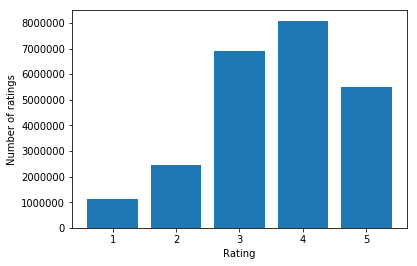

In [189]:
plt.bar(counter.keys(), counter.values())
plt.xlabel('Rating')
plt.ylabel('Number of ratings')

In [190]:
note_par_utilisateur = data.groupby('customer_id')["rating"].count()

In [191]:
# On transforme le type : numpy.ndarray to list
nb_note_utilisateur = list(note_par_utilisateur.values)

In [192]:
nb = data["customer_id"].unique()
nb

array([1488844,  822109,  885013, ..., 1017887,   72311,  594210],
      dtype=int64)

# Distribution du nombre total de notes par utilisateur

In [193]:
v_max = max(note_par_utilisateur.values)
print("La valeur max du nombres de notes par utilisateur est :", v_max)

La valeur max du nombres de notes par utilisateur est : 4467


In [194]:
moyenne = mean(note_par_utilisateur)
print("La moyenne est de :", moyenne)

La moyenne est de : 51.09581568449182


In [195]:
#Determine le point de données le plus fréquent/ plus populaire
mode = statistics.mode(note_par_utilisateur)
print("le point de données le plus populaire est :", mode)# Nb d'utilisateurs qui ont noté 2 fois = 17261

le point de données le plus populaire est : 2


In [196]:
#Calcul de la mediane : valeur centrale 
mediane = np.median(note_par_utilisateur)
print(mediane)




24.0


In [197]:
ecart = np.std(note_par_utilisateur)
print("L'ecart type est de : ", ecart)

L'ecart type est de :  74.40497575476567


In [198]:
variance = np.var(note_par_utilisateur)
print("La variance est de : ", variance)

La variance est de :  5536.100417067268


In [199]:
quantiles1 = np.percentile(note_par_utilisateur, 25)
print(quantiles1)

quantiles2 = np.percentile(note_par_utilisateur, 75)
print(quantiles2)



8.0
64.0


{'whiskers': [<matplotlib.lines.Line2D at 0x24100f44ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x24100f3c4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24100f44a58>],
 'medians': [<matplotlib.lines.Line2D at 0x24100f3ccf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24100f47160>],
 'means': []}

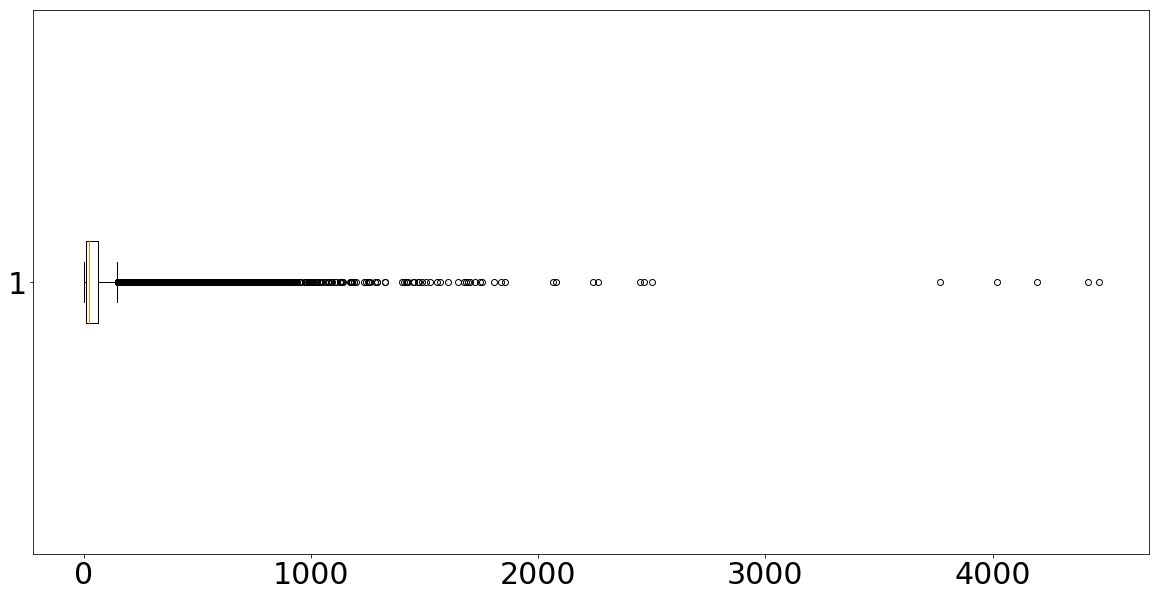

In [200]:
#stat = np.concatenate((ecart,mediane,quantiles1,quantiles2))
font= {'size': 30}
plt.rc('font',**font)
plt.figure(figsize = (20,10))

plt.boxplot(note_par_utilisateur, vert=False)